<a target="_blank" href="https://colab.research.google.com/github/sonder-art/automl_p24/blob/main/codigo/intro_ml/04_train_test.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Videos de Tarea

[Optimization](https://www.youtube.com/watch?v=AM6BY4btj-M)

[Constrained Optimization](https://www.youtube.com/watch?v=uh1Dk68cfWs)

[Hyperparameters](https://www.youtube.com/watch?v=VTE2KlfoO3Q)




# Introduccion a ML

## Librerias

In [19]:
import numpy as np
import pandas as pd
# ### Graficas
import matplotlib.pyplot as plt
import seaborn as sns

# ### Regresion Lineal
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(16,6)})

## Funcion de graficacion y regresion lineal

In [25]:
def foo_regresion(X, Y, test_size=0.2, print_coefficients=False):
    # Splitting the data into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

    # Initialize the linear regression model
    regression = linear_model.LinearRegression()

    # Train the model with the training data
    regression.fit(X_train, Y_train)

    # Making predictions on the training and test sets
    Y_hat_train = regression.predict(X_train)
    Y_hat_test = regression.predict(X_test)

    # Function to create a DataFrame from predictions and actual values
    def create_df(Y_actual, Y_predicted):
        error = np.sqrt(np.square(np.subtract(Y_predicted, Y_actual)))
        return pd.DataFrame({'Y_hat': Y_predicted, 'Y': Y_actual, 'Error': np.subtract(Y_predicted, Y_actual)}), np.abs(error).mean()

    # Create DataFrames and calculate RMSE for train and test sets
    df_train, rmse_train = create_df(Y_train, Y_hat_train)
    df_test, rmse_test = create_df(Y_test, Y_hat_test)

    # Configuring the size and aesthetics of the plots using Seaborn
    sns.set(style="whitegrid", palette="pastel", color_codes=True, rc={'figure.figsize': (12, 8)})

    # Combined scatter plot: Actual vs Predicted for both train and test sets
    plt.subplot(2, 2, 1)
    sns.scatterplot(x='Y', y='Y_hat', data=df_train, color='blue', label='Train')
    sns.scatterplot(x='Y', y='Y_hat', data=df_test, color='green', label='Test')
    plt.plot(df_train['Y'], df_train['Y'], color='red', linestyle='--')
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()

    # Combined histogram of Prediction Errors for both train and test sets
    plt.subplot(2, 2, 2)
    sns.histplot(df_train['Error'], kde=True, color='blue', label='Train', alpha=0.6, stat='probability')
    sns.histplot(df_test['Error'], kde=True, color='green', label='Test', alpha=0.6, stat='probability')
    plt.title('Histogram of Prediction Errors')
    plt.xlabel('Prediction Error')
    plt.ylabel('Proportion')
    plt.legend()

    # Combined scatter plot: Error vs Actual Y for both train and test sets
    plt.subplot(2, 2, 3)
    sns.scatterplot(x='Y', y='Error', data=df_train, color='blue', label='Train')
    sns.scatterplot(x='Y', y='Error', data=df_test, color='green', label='Test')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Error vs Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Prediction Error')
    plt.legend()

    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()

    # Print RMSE for train and test data side by side
    print(f'Train RMSE: {rmse_train} | Test RMSE: {rmse_test}')
    print(f'Ratio Test_RMSE/Train_RSME: {rmse_test/rmse_train}')
    

    # Optionally, print the regression coefficients if requested
    if print_coefficients:
        print(f'Regression coefficients: {regression.coef_}')
        print(f'Intercept: {regression.intercept_}')


# Simulaciones

## Modelos Lineales 

### Sin error/incertidumbre

$y = x_1 - 3x_2 + 4x_3$

In [22]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Matriz de Diseño
X = np.random.normal(size=(N,3))
# Simulacion de Y
Y = np.matmul(X,np.array([1,-3,4]))

df = pd.DataFrame(data=X, columns=['x1','x2','x3'])
df['y'] = Y

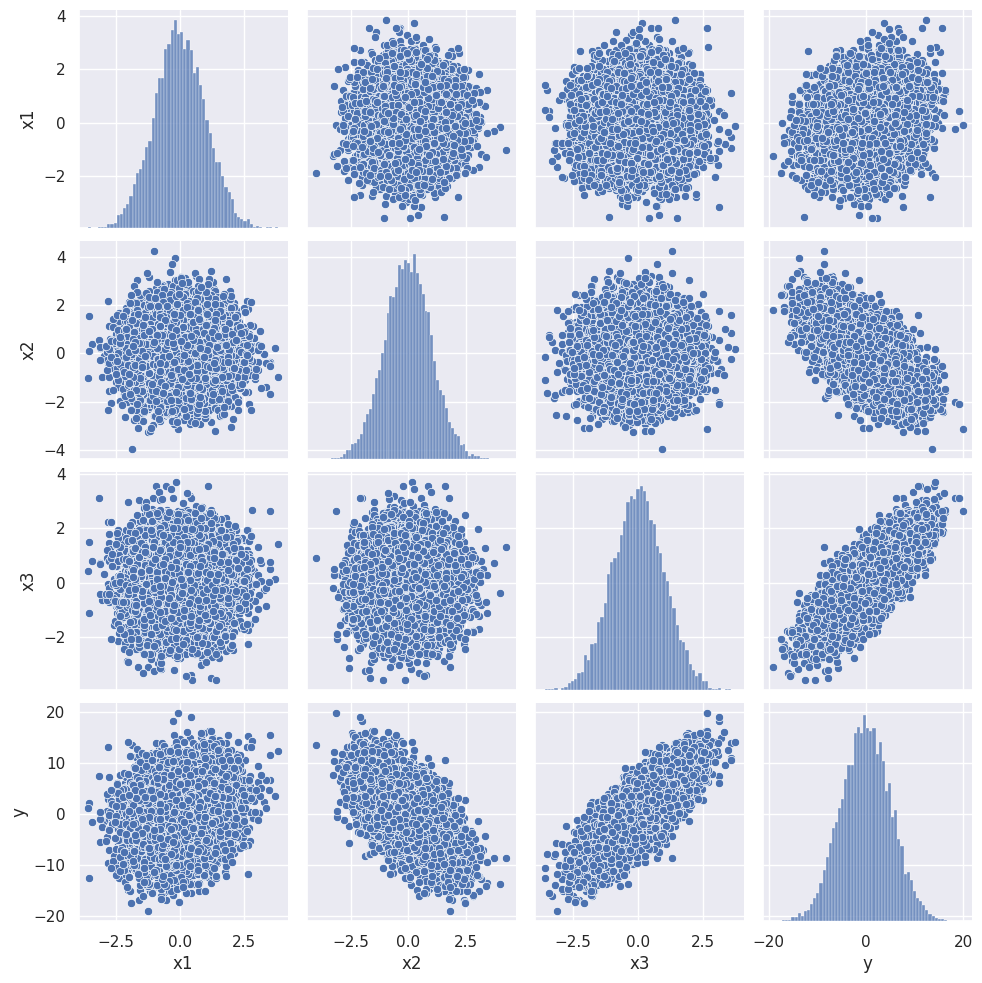

In [23]:
sns.pairplot(df)

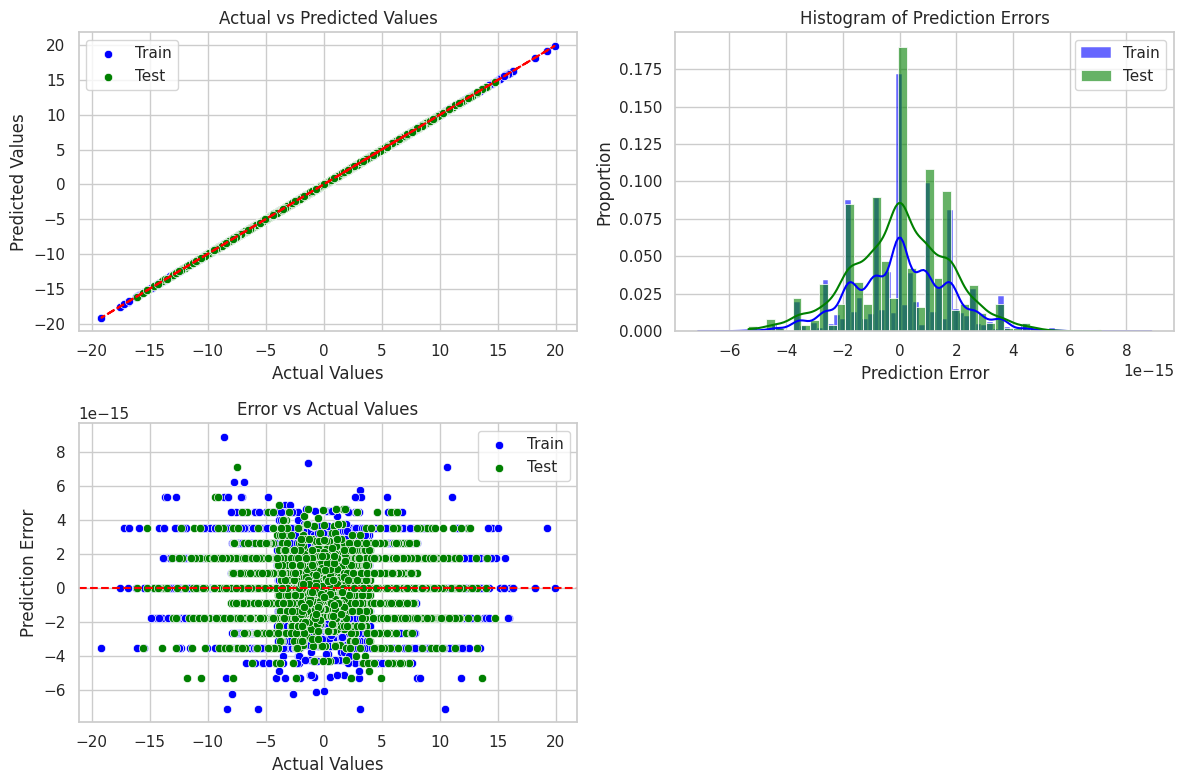

Train RMSE: 1.3259480319272043e-15 | Test RMSE: 1.3299847334558023e-15
Ratio Test_RMSE/Train_RSME: 1.0030443889439098
Regression coefficients: [ 1. -3.  4.]
Intercept: 1.249000902703301e-16


In [26]:
foo_regresion(X,Y,.2,True)

### Con error/incertidumbre

$y = x_1 - 3x_2 + 4x_3 + \epsilon$

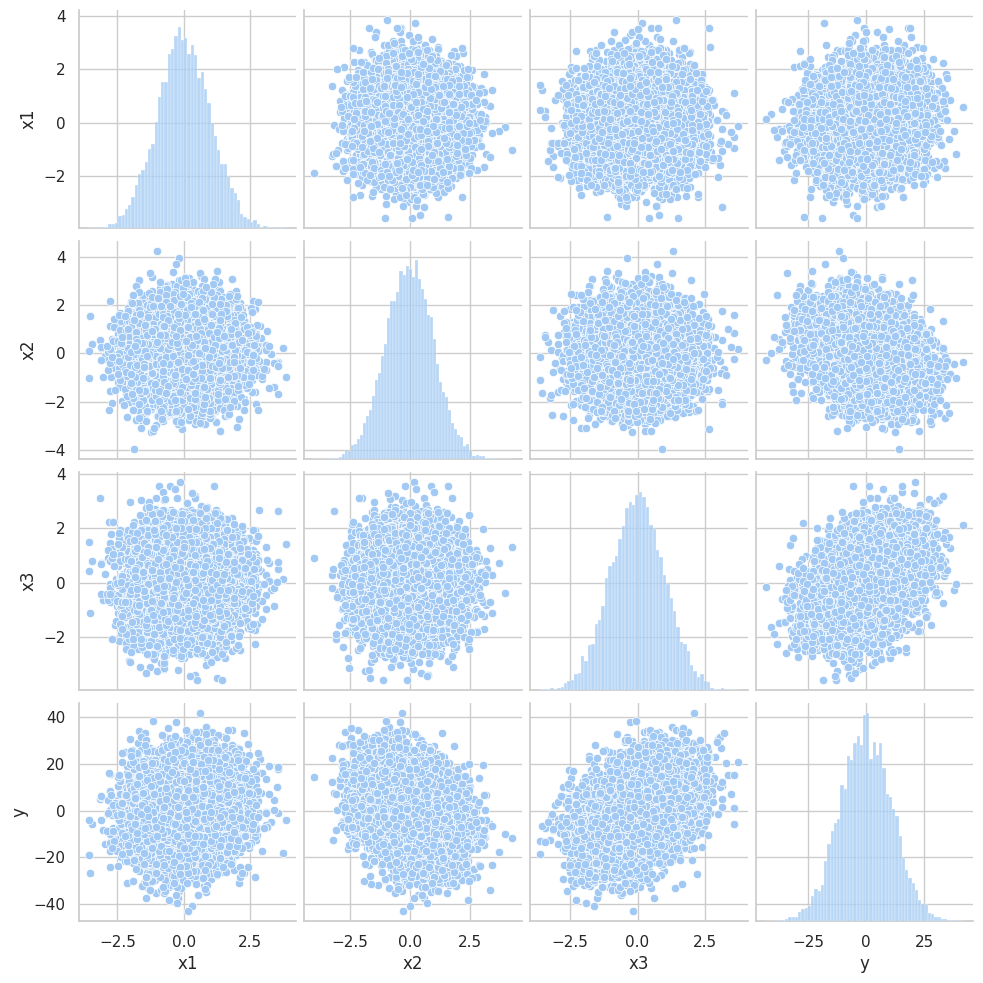

In [27]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000

# Matriz de Diseño
X = np.random.normal(size=(N,3))
eps = np.random.normal(0,10, size=(N,1))

# Simulacion de Y
Y = np.matmul(X,np.array([1,-3,4])).reshape((N,1)) + eps
Y = Y.reshape(-1)

df = pd.DataFrame(data=X, columns=['x1','x2','x3'])
df['y'] = Y
sns.pairplot(df)

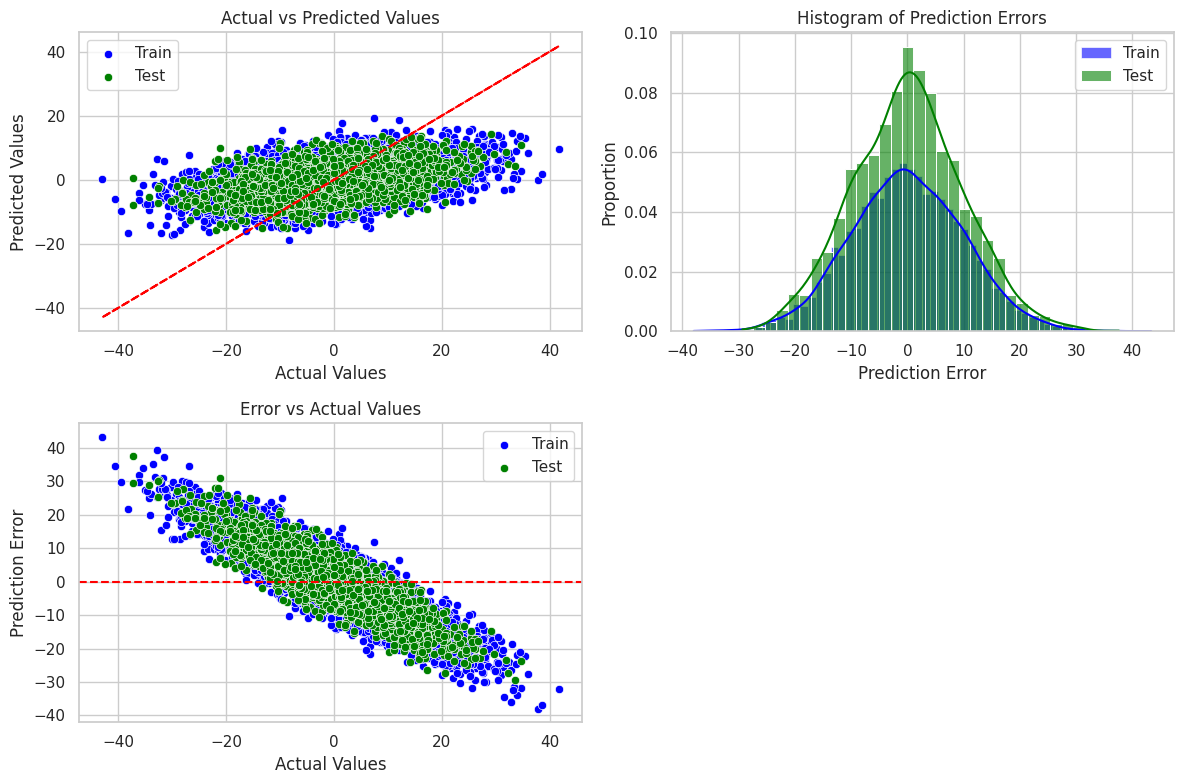

Train RMSE: 7.994083748209665 | Test RMSE: 7.754130425259261
Ratio Test_RMSE/Train_RSME: 0.9699836365857258
Regression coefficients: [ 0.96590853 -2.97519046  3.87057952]
Intercept: -0.06857376547217706


In [28]:
foo_regresion(X,Y,.2,True)

## Modelos no Lineales

### Sin error/incertidumbre

y = $ \frac{1}{x}$

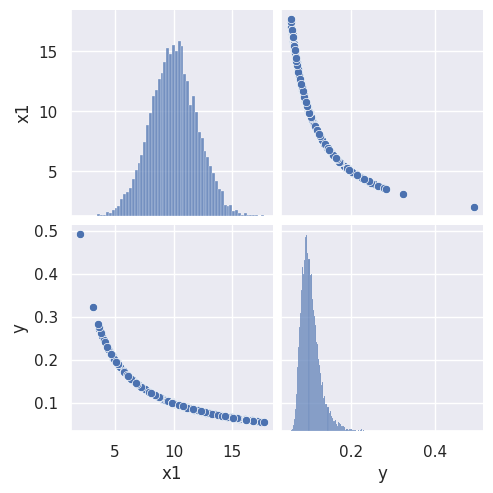

In [29]:
sns.set(rc={'figure.figsize':(16,6)})
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Matriz de Diseño
X = np.random.normal(10,2,size=(N,1))
# Simulacion de Y
Y = 1/X 
Y = Y.reshape(-1)

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

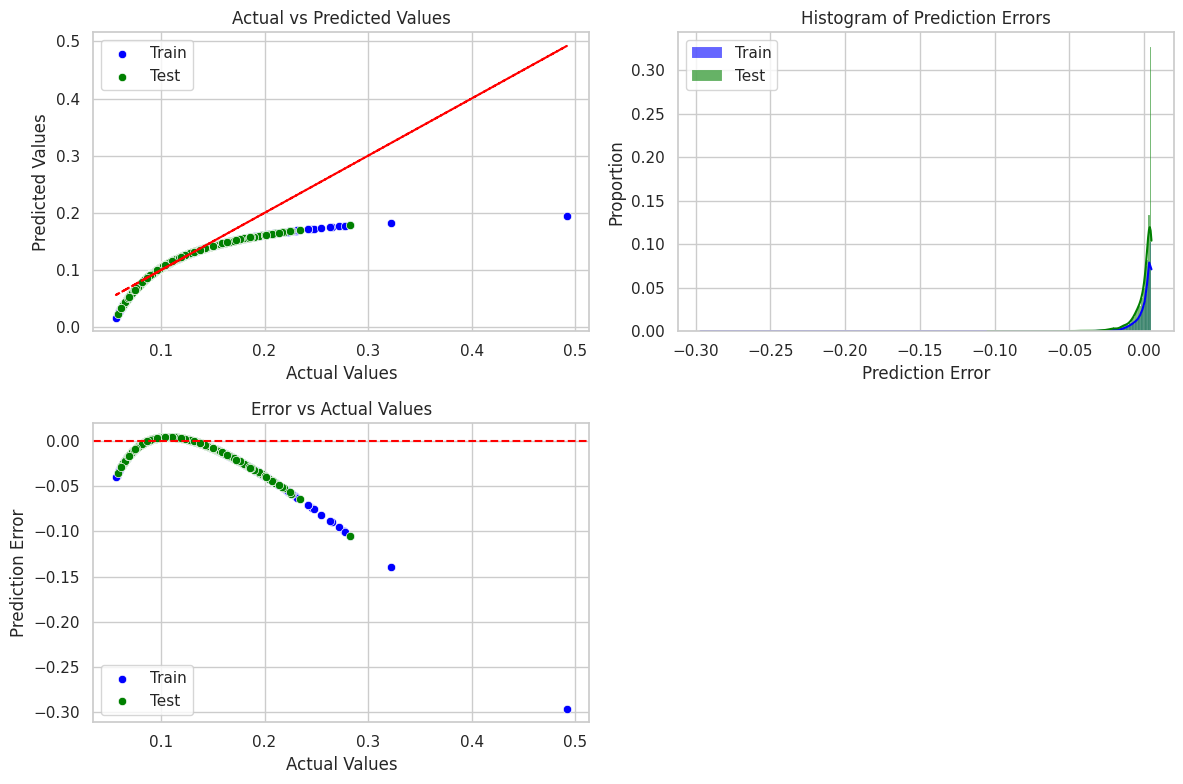

Train RMSE: 0.004814391321103127 | Test RMSE: 0.004993118260062455
Ratio Test_RMSE/Train_RSME: 1.0371234756460086
Regression coefficients: [-0.01139299]
Intercept: 0.21845439755118742


In [30]:
foo_regresion(X,Y,.2,True)

Parece que no esta aproximando bien. **Usemos transformaciones polinomiales de X** (nuestras features o matriz de disenno) para mejorar la prediccion.

Creacion de variable X^1.5
Creacion de variable X^1.3333333333333333
Creacion de variable X^1.25
Creacion de variable X^1.2
Creacion de variable X^1.1666666666666667
Creacion de variable X^1.1428571428571428
Creacion de variable X^1.125
Creacion de variable X^1.1111111111111112
[[12.21885928 42.71161517 28.14324799 ... 17.47112046 16.70742407
  16.1365931 ]
 [11.18543016 37.40925295 25.0151774  ... 15.79283935 15.12635458
  14.62748482]
 [11.64473911 39.73696046 26.39406917 ... 16.53613521 15.82690455
  15.29637864]
 ...
 [11.67657664 39.90003729 26.49033065 ... 16.58781496 15.87559372
  15.34285389]
 [10.80422757 35.51326357 23.88498451 ... 15.17923796 14.54765317
  14.07464566]
 [12.30953003 43.18791206 28.42204327 ... 17.61936506 16.84696433
  16.26969508]]


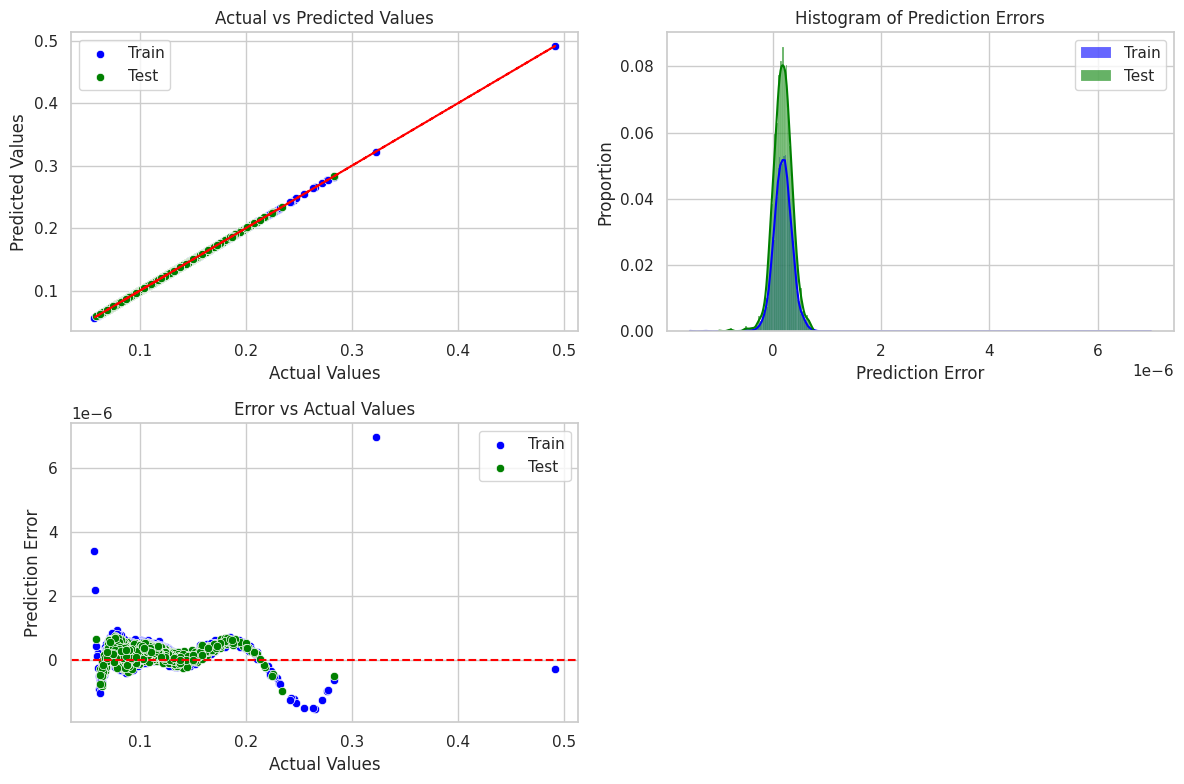

Train RMSE: 2.1398586105521397e-07 | Test RMSE: 2.119628512947322e-07
Ratio Test_RMSE/Train_RSME: 0.9905460587418915


In [31]:
X2 = X.copy()

# ## Feature Eng
X2 = np.reshape(X2, (N,1))
# Crea un Polinomio
for n in range(2,10):
    X2 = np.concatenate((X2,np.power(X2[:,0],1+1/n).reshape((N,1))), axis=1)
    print(f'Creacion de variable X^{1+1/n}')
print(X2)
foo_regresion(X2,Y,.2,False)

Podemos ver que nuestro error de prediccion mejora comparado con no hacer ninguna ingenieria de variables.

Ahora salgamonos del mundo polinomial y creemos una transformacion perfecta de nuestras variables X para predecir. Esto requiere que nos salgamos del mundo del teorema de `stone-weistrass`

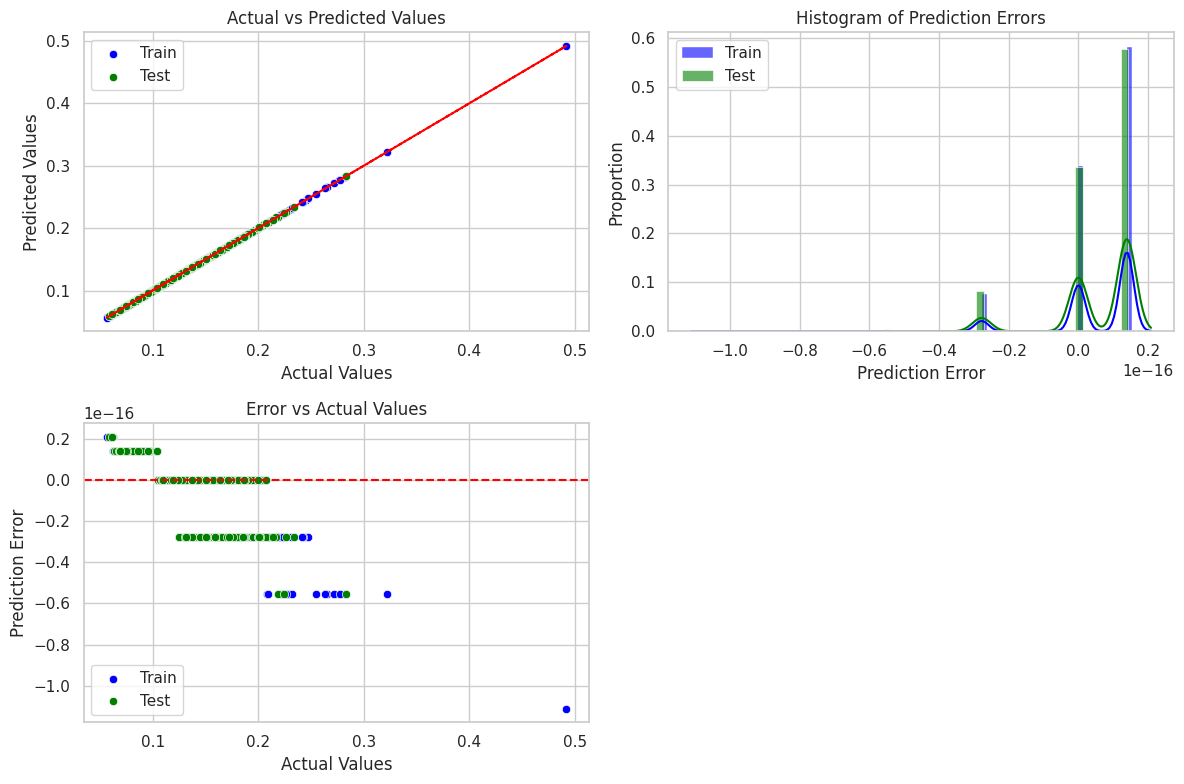

Train RMSE: 1.033895191682177e-17 | Test RMSE: 1.0436096431476472e-17
Ratio Test_RMSE/Train_RSME: 1.0093959731543625
Regression coefficients: [1.]
Intercept: 4.163336342344337e-17


In [32]:
X3 = X.copy()
# ## Feature Eng
X3 = 1/X3
foo_regresion(X3,Y,.2,True)

Ahora creemos una funcion mas compleja. En la funcion anterior se veia claramente una relacion de tipo $1/x$ al graficar, pero esto no es comun en el mundo real donde tenemos decenas, cientos, miles o millones de variables que afectan a $Y$. No es facil graficar una o dos variables a la vez para ver como afectan a $Y$, ademas de que puede haber efectos cruzados/combinados. Por ello tratemos de crear una funcion compleja en la cual sea dificil adivinar la relacion exacta entre $Y$ y $X$, la idea es que sea dificil de adivinar y tengamos que recurrir a ingenieria de variables no tan perfecta o educada.

$y = x + ln(x) + xln(x) + 1/x + x^{1.3}$

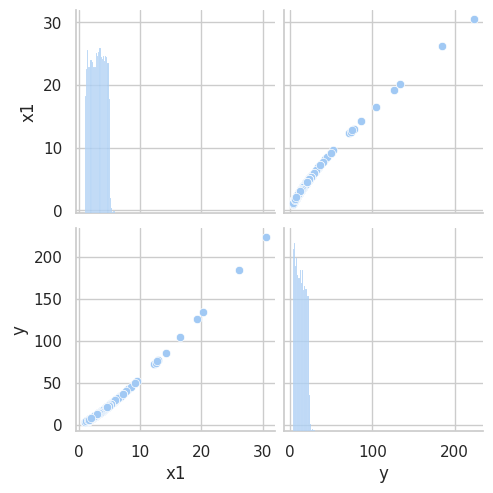

In [33]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Generar Xs
X = np.random.uniform(1,5,size=(N,1)) + np.random.lognormal(0,2,size=(N,1))/100

# Generar Y
Y = X + np.log(X) + X*np.log(X) + 1/X + np.power(X,1.3)
Y = Y.reshape(-1)


df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

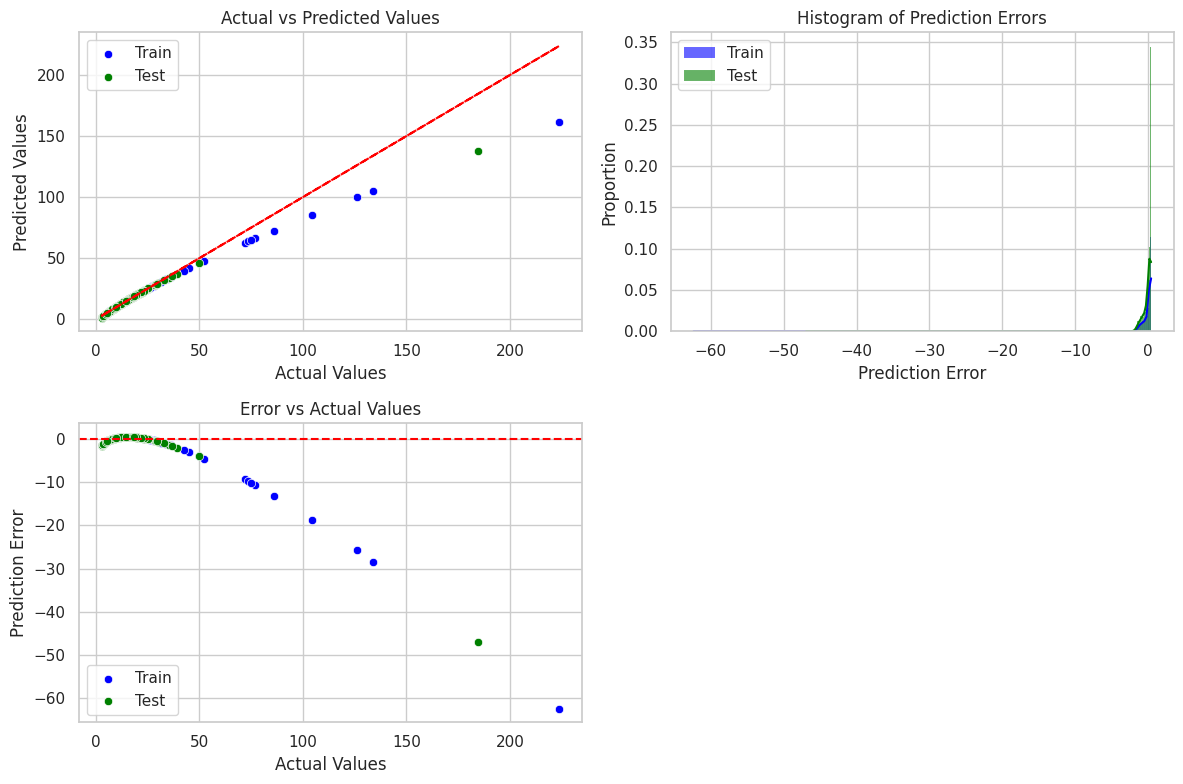

Train RMSE: 0.4250956519384539 | Test RMSE: 0.43273267670213883
Ratio Test_RMSE/Train_RSME: 1.0179654266724671
Regression coefficients: [5.41305206]
Intercept: -3.9978214710500435


In [34]:
foo_regresion(X,Y,.2,True)

Creacion de variable X^[1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5]


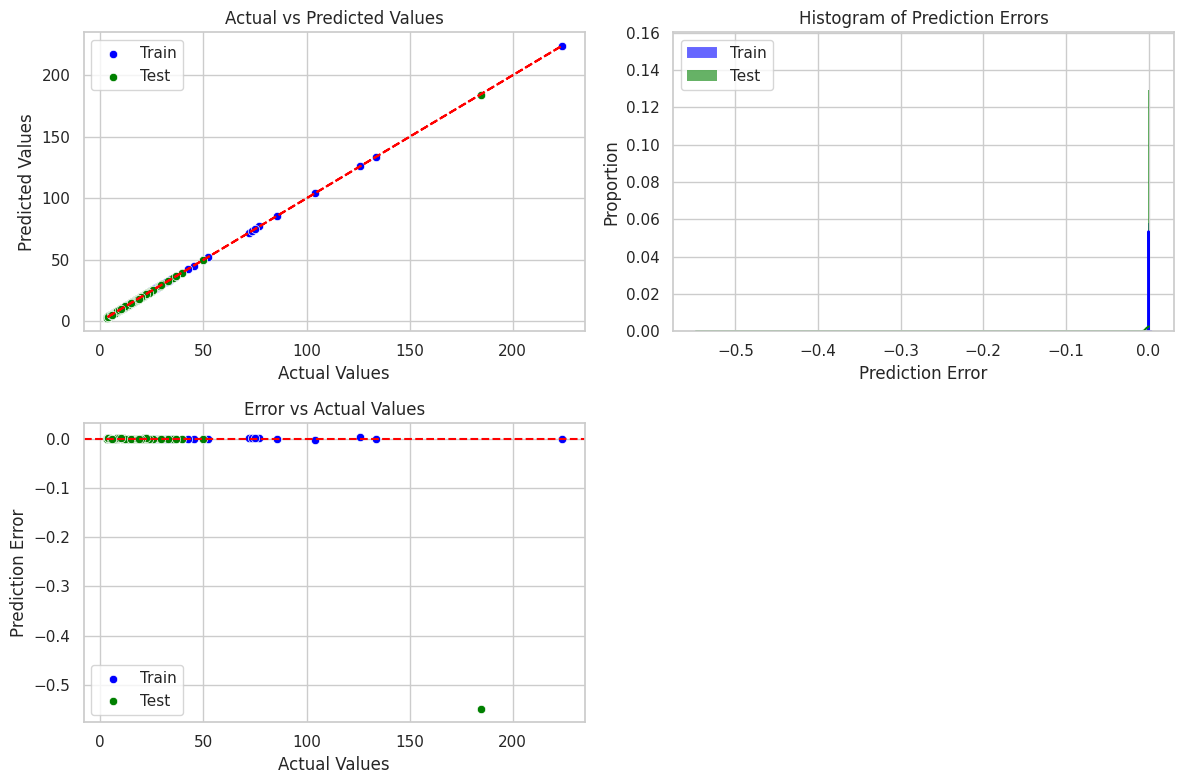

Train RMSE: 6.850812137535012e-05 | Test RMSE: 0.00034371187631284614
Ratio Test_RMSE/Train_RSME: 5.017096796884537


In [35]:
#Ingenieria de Variables
X2 = np.reshape(X, (N,1))
# Lista para guardar exponentes del polinomio.
power = [1 + n/2 for n in range(1,10)]
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)

print(f'Creacion de variable X^{power}')

foo_regresion(X2,Y)

Que esta pasando con el error de test?

## Funciones Periodicas

$ y = sin(x) $

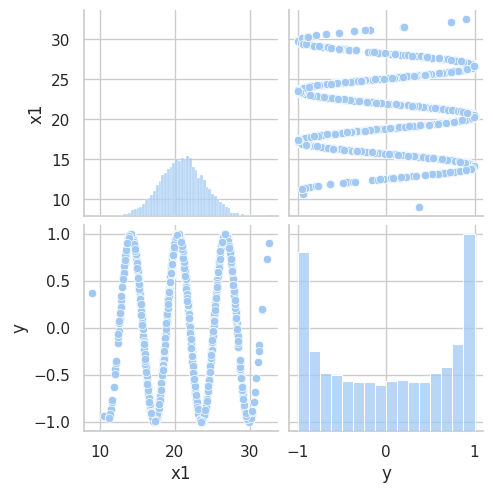

In [37]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Generar Xs
#X = np.random.uniform(1,5,size=(N,1)) + np.random.lognormal(0,2,size=(N,1))
X = np.random.normal(1,3,size=(N,1)) + 20
# Generar Y
Y = np.sin(X)
Y = Y.reshape(-1)

#Ingenieria de Variables
X = np.reshape(X, (N,1))

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

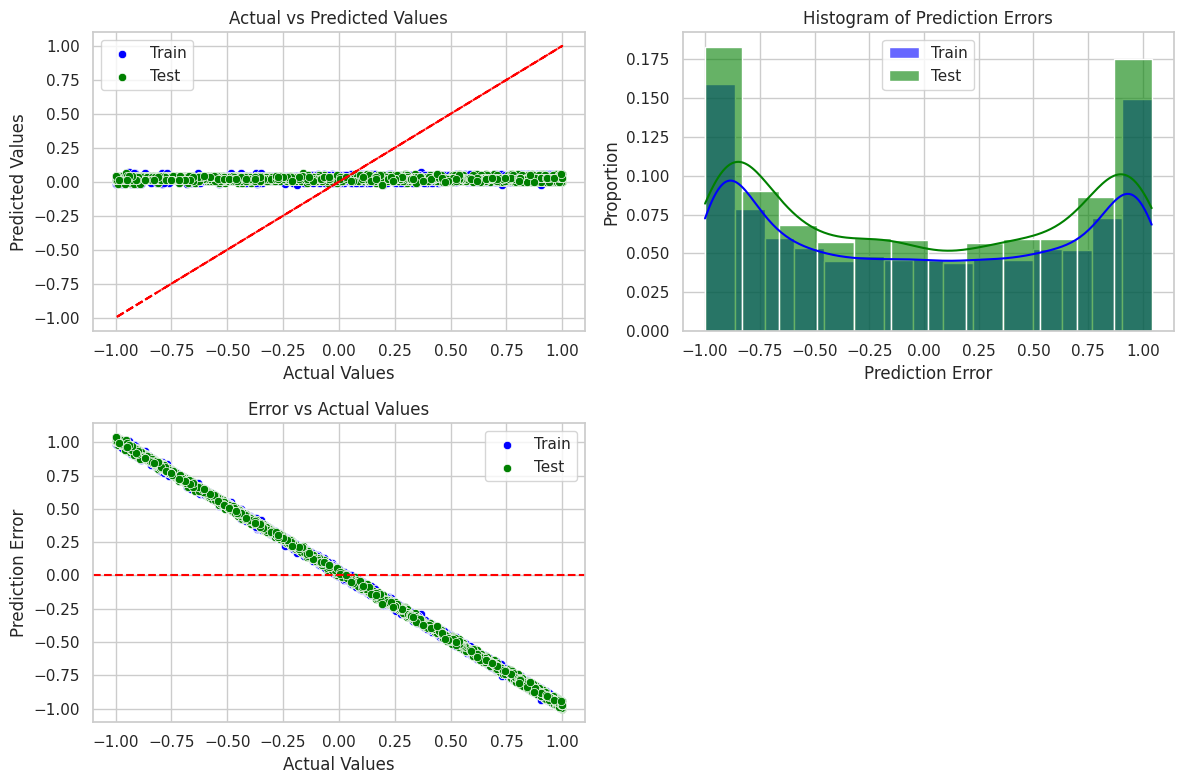

Train RMSE: 0.6311877205995601 | Test RMSE: 0.6409617912584433
Ratio Test_RMSE/Train_RSME: 1.0154852040682905


In [38]:
foo_regresion(X,Y,.2,False)

La prediccion es bastante mala, creemos un polinomio para mejorarla.

Creando X^[2.0, 1.5, 1.3333333333333333, 1.25, 1.2, 1.1666666666666667, 1.1428571428571428, 1.125, 1.1111111111111112, 1.1, 1.0909090909090908, 1.0833333333333333, 1.0769230769230769, 1.0714285714285714, 1.0666666666666667, 1.0625, 1.0588235294117647, 1.0555555555555556, 1.0526315789473684, 1.05, 1.0476190476190477, 1.0454545454545454, 1.0434782608695652, 1.0416666666666667, 1.04, 1.0384615384615385, 1.037037037037037, 1.0357142857142858, 1.0344827586206897, 1.0333333333333334, 1.032258064516129, 1.03125, 1.0303030303030303, 1.0294117647058822, 1.0285714285714285, 1.0277777777777777, 1.027027027027027, 1.0263157894736843, 1.0256410256410255, 1.025, 1.024390243902439, 1.0238095238095237, 1.0232558139534884, 1.0227272727272727, 1.0222222222222221, 1.0217391304347827, 1.0212765957446808, 1.0208333333333333, 1.0204081632653061, 1.02, 1.0196078431372548, 1.0192307692307692, 1.0188679245283019, 1.0185185185185186, 1.018181818181818, 1.0178571428571428, 1.0175438596491229, 1.0172413793103448,

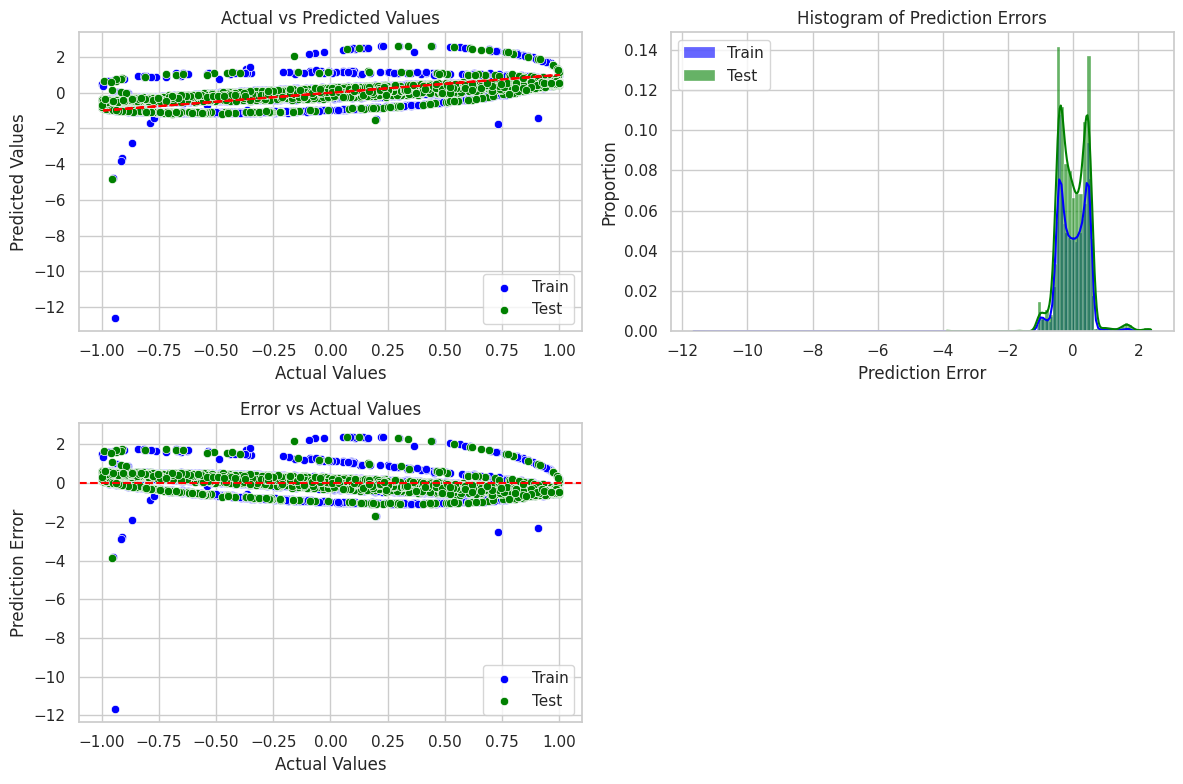

Train RMSE: 0.36367384081124327 | Test RMSE: 0.3736002786546646
Ratio Test_RMSE/Train_RSME: 1.0272948909970498


In [39]:
X2 = X.copy()
power = [1 + 1/n for n in range(1,1000)]
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)
print(f"Creando X^{power}")
foo_regresion(X2,Y,.2,False)

Parece que el error mejoro un poco, pero sigue siendo muy alto apesar de tener muchas nuevas variables polinomiales. Trata de explorar si puedes mejorar el error utilizando solo transformaciones polinomiales. No es la peor prediccion, pero no es muy buena.

# Limites de Modelaje

## Extrapolacion o "Fat-Tails"

Ahora veamos que pasa cuando nuestros datos son muy dispersos. La idea es que veamos como se comporta el modelo con extrapolacion.

$ y = sin(x) $

Pero esta vez, $X$ tomara valores muy dispersos, osea tendra mucha varianza!

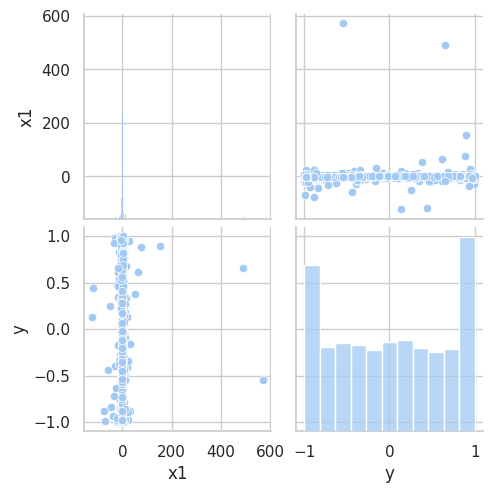

In [40]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 1000
# Generar Xs
#X = np.random.uniform(1,5,size=(N,1)) + np.random.lognormal(0,2,size=(N,1))
X = np.random.standard_cauchy(size=(N, 1))
# Generar Y
Y = np.sin(X)
Y = Y.reshape(-1)

#Ingenieria de Variables
X = np.reshape(X, (N,1))

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

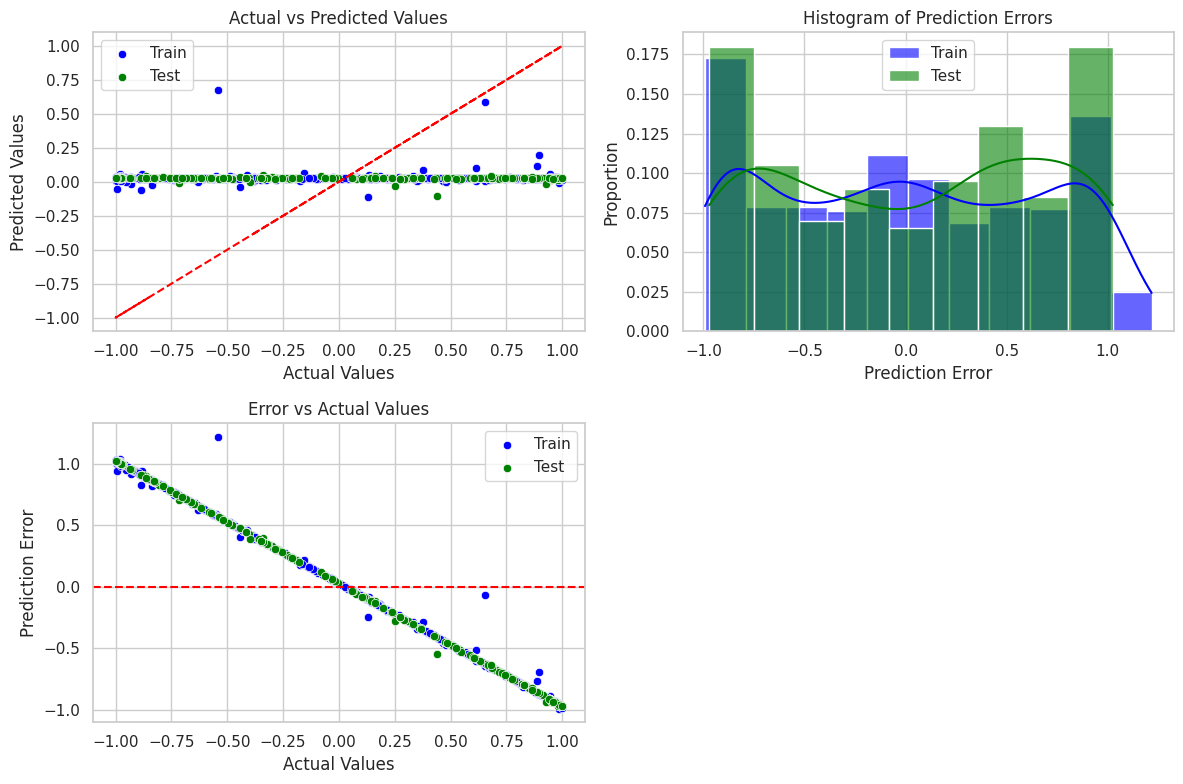

Train RMSE: 0.5645413783657294 | Test RMSE: 0.6015156609889607
Ratio Test_RMSE/Train_RSME: 1.0654943712545337


In [41]:
foo_regresion(X,Y,.2,False)

[2, 3, 4, 5, 6, 7, 8, 9]


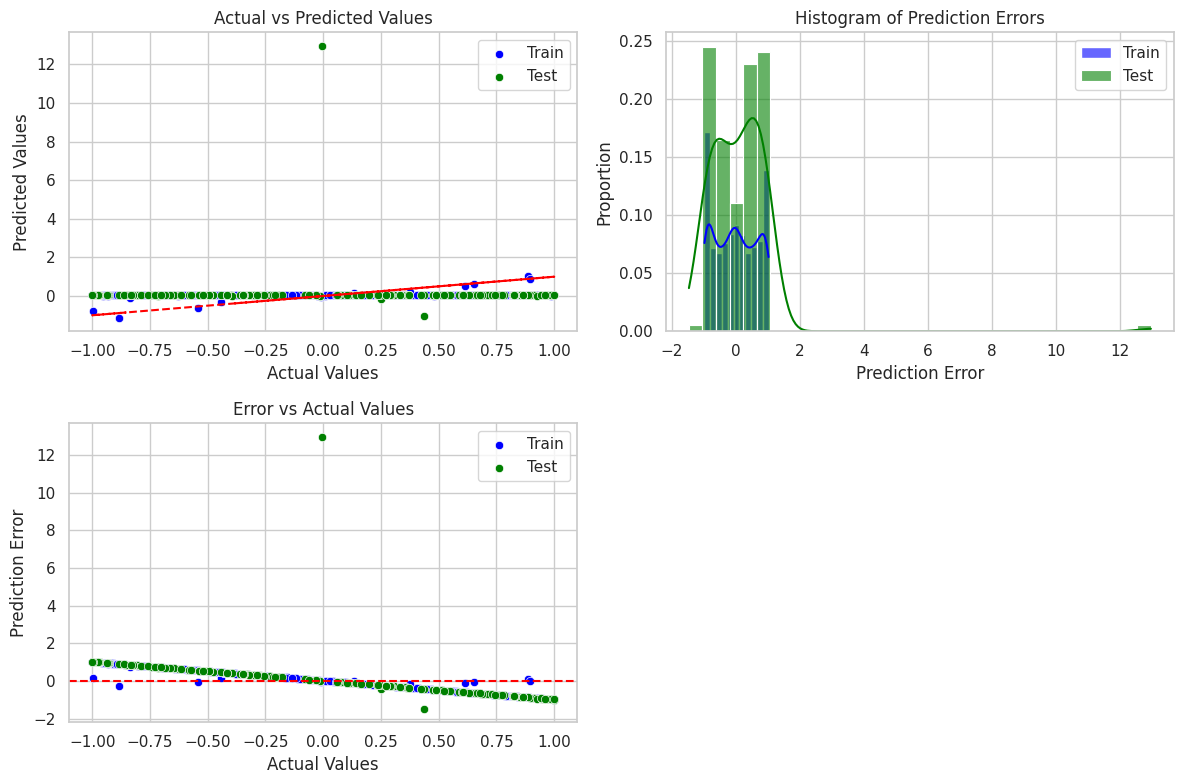

Train RMSE: 0.5586784118110173 | Test RMSE: 0.6717313095405457
Ratio Test_RMSE/Train_RSME: 1.2023577345024932


In [42]:
X2 = X.copy()
# Exponentes polinomiales
power = [n for n in range(2,10)]
print(power)
for p in power:
    X2 = np.concatenate((X2,np.power(X[:,0],p).reshape((N,1))), axis=1)
for p in power:
    X2 = np.concatenate((X2,np.power(X[:,0],-p).reshape((N,1))), axis=1)
foo_regresion(X2,Y,.2)

+ Que notas sobre los errores de train comparados con test respecto a las predicciones anteriores del $sin(x)$? Piensa en las fat tails.
+ En donde aparecen los errores mas altos en test? Notas algun patron en particular?
+ Utilizando solo transformaciones polinomicas y la regresion lineal que podrias hacer para mejorar el modelo en test?

## Incertidumbre no observada

Ahora utilicemos una de nuestras funciones anteriores pero agreguemos incertidumbre. Esta incertidumbre podria representar variables omitidas, ruido en la muestra, incertidumbre inherente al modelo, errores de captura, etc..

Simulemos heterocedasticidad, rompiendo el supuesto donde $E[\epsilon | x] != 0$

$y = x_1 + \epsilon_1*\epsilon_2$

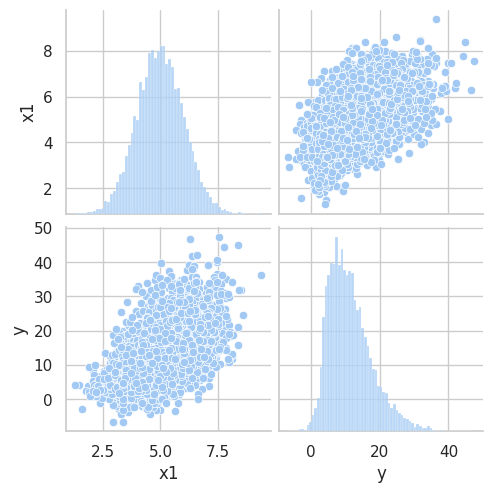

In [43]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Matriz de Diseño
mean = [5,2,3]
cov = [[1,.5,.5],[.5,2,.5],[.5,.5,2]]
X = np.random.multivariate_normal(mean, cov, N)


# Simulacion de Y
Y = X[:,0] + X[:,1]*X[:,2]
Y = Y.reshape(-1)
X = X[:,0]
X = X.reshape((N,1))

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

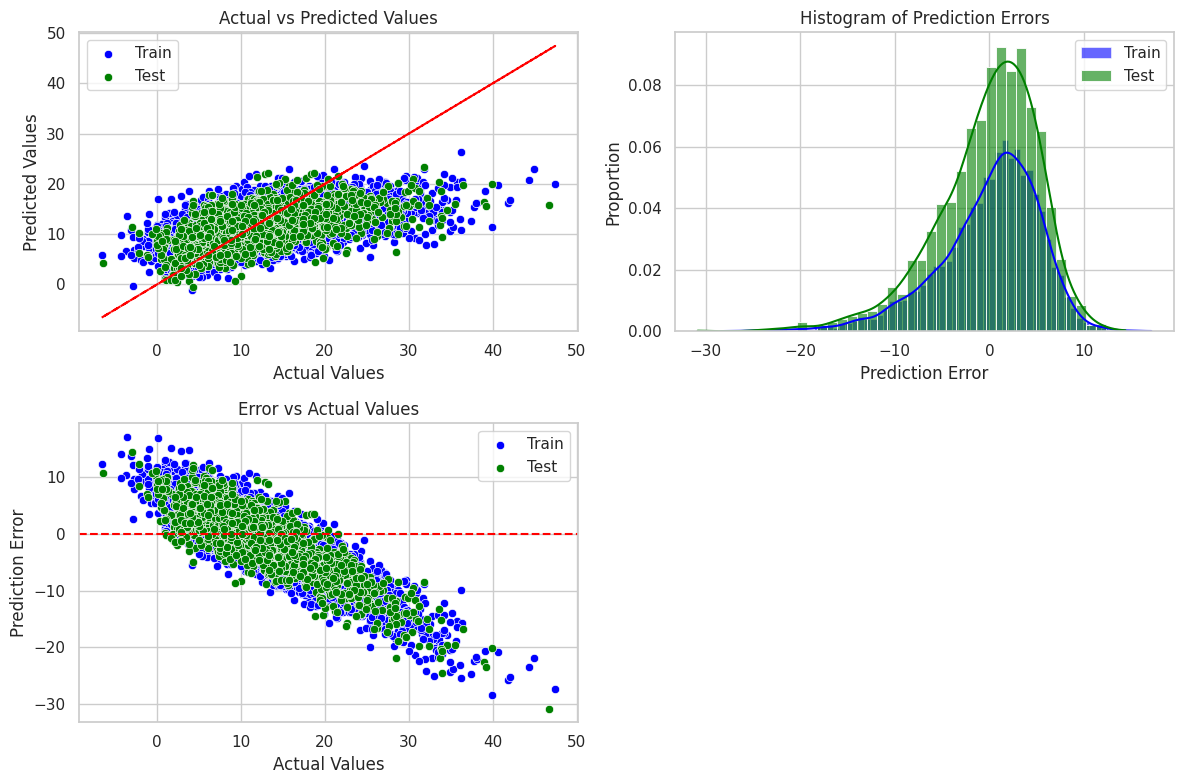

Train RMSE: 4.167203480583698 | Test RMSE: 4.155811955986139
Ratio Test_RMSE/Train_RSME: 0.9972663862826389
Regression coefficients: [3.4133525]
Intercept: -5.643404455798777


In [44]:
foo_regresion(X,Y,.2,True)

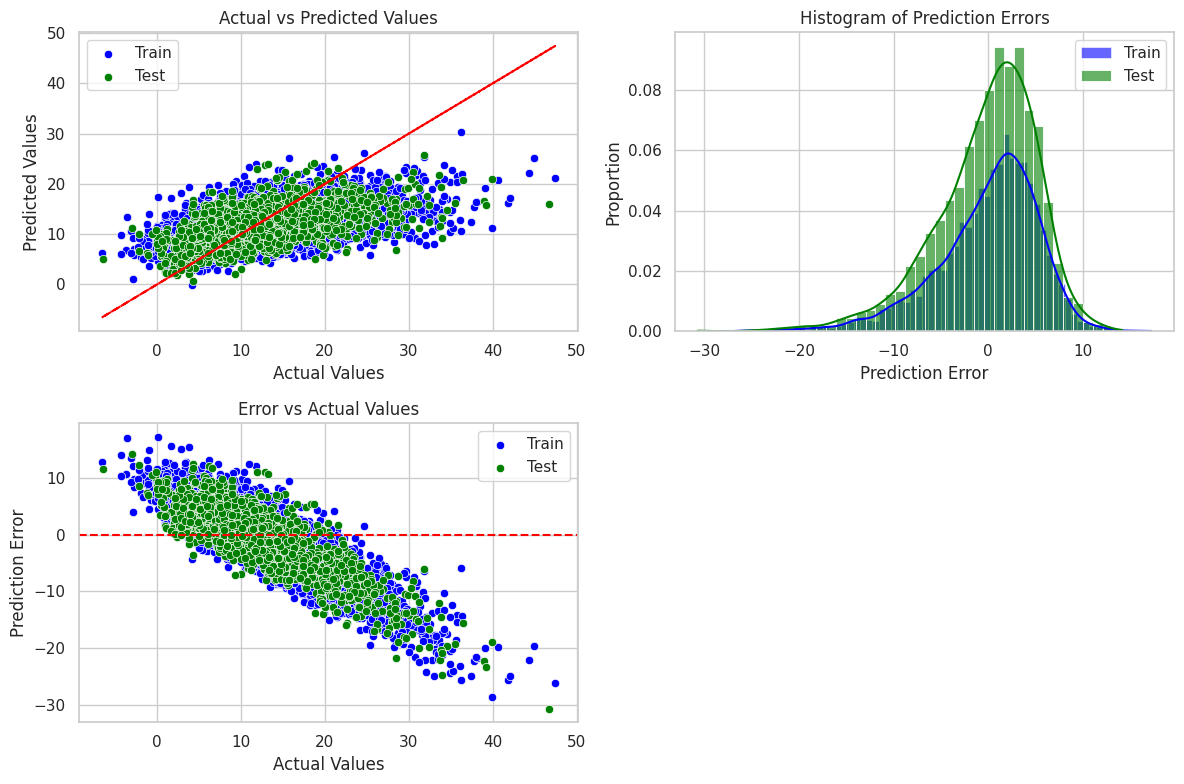

Train RMSE: 4.1636026017409 | Test RMSE: 4.146257403807553
Ratio Test_RMSE/Train_RSME: 0.9958340889867601


In [46]:
X2 = X.copy()

#Ingenieria de Variables
power = [1 + n for n in range(1,2)]
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],-p).reshape((N,1))), axis=1)
foo_regresion(X2,Y,.2)

+ Que esta pasando con nuestro error de test y train cuando estamos agregando mas variables (transforamciones de x)?

Ahora usemos un modelo aun mas complejo y regresemos al supuesto $E[\epsilon | x] = 0$

$y =  x + ln(x) + xln(x) + 1/x + x^{1.3} + \epsilon_1*\epsilon_2$

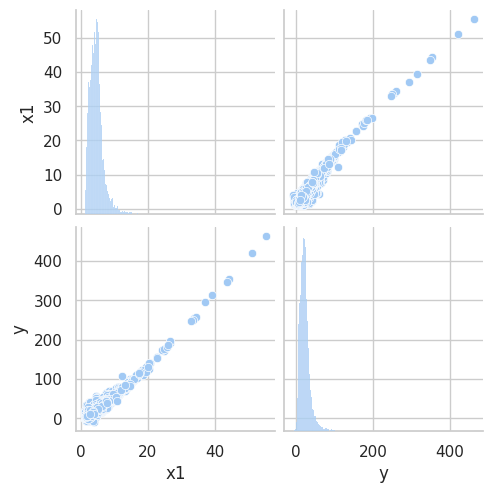

In [47]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Generar Xs
X = np.random.uniform(1,5,size=(N,1)) + np.random.lognormal(0,1,size=(N,1))
mean = [1,1]
cov = [[2,.3],[.3,5]]
E = np.random.multivariate_normal(mean, cov, N)
# Generar Y
Y = X + np.log(X) + X*np.log(X) + 1/X + np.power(X,1.3) + (E[:,0]*E[:,1]).reshape((N,1))
Y = Y.reshape(-1)

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

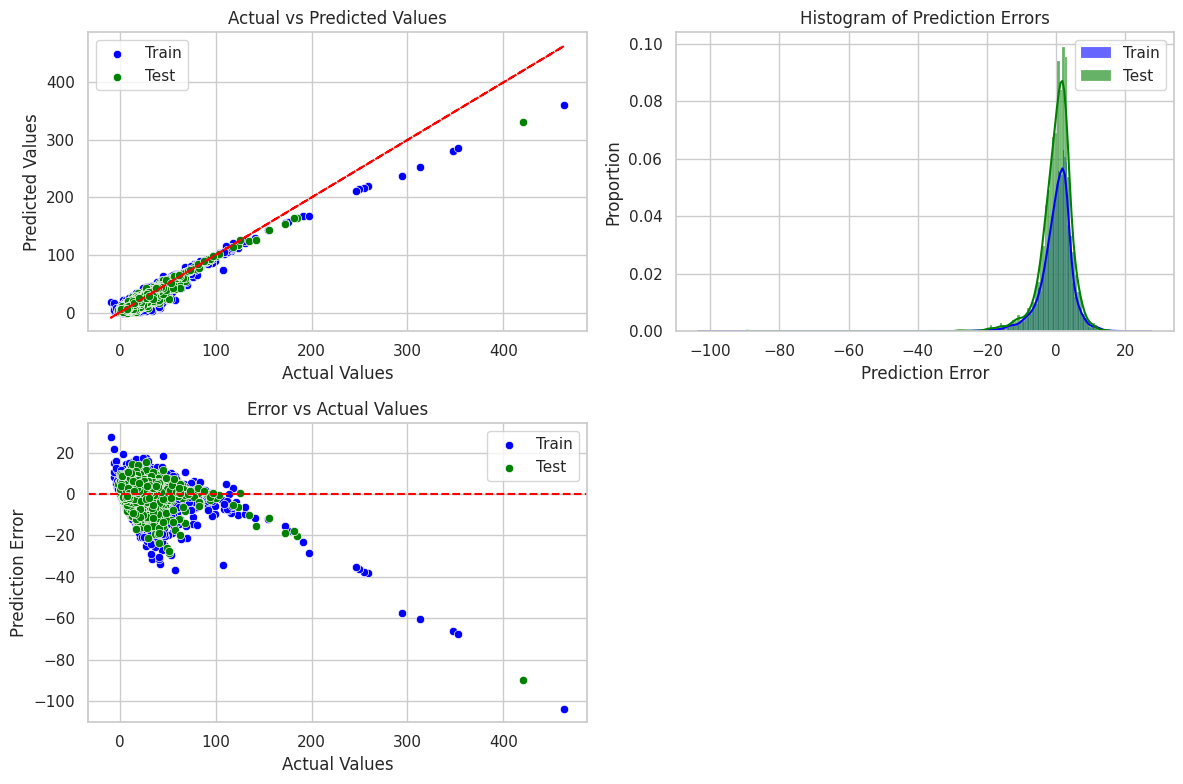

Train RMSE: 3.383869944288365 | Test RMSE: 3.234593238017171
Ratio Test_RMSE/Train_RSME: 0.9558858027262076


In [48]:
foo_regresion(X,Y,.2)

Utilicemos un polinomio muy grande para tratar de mejorar el modelo

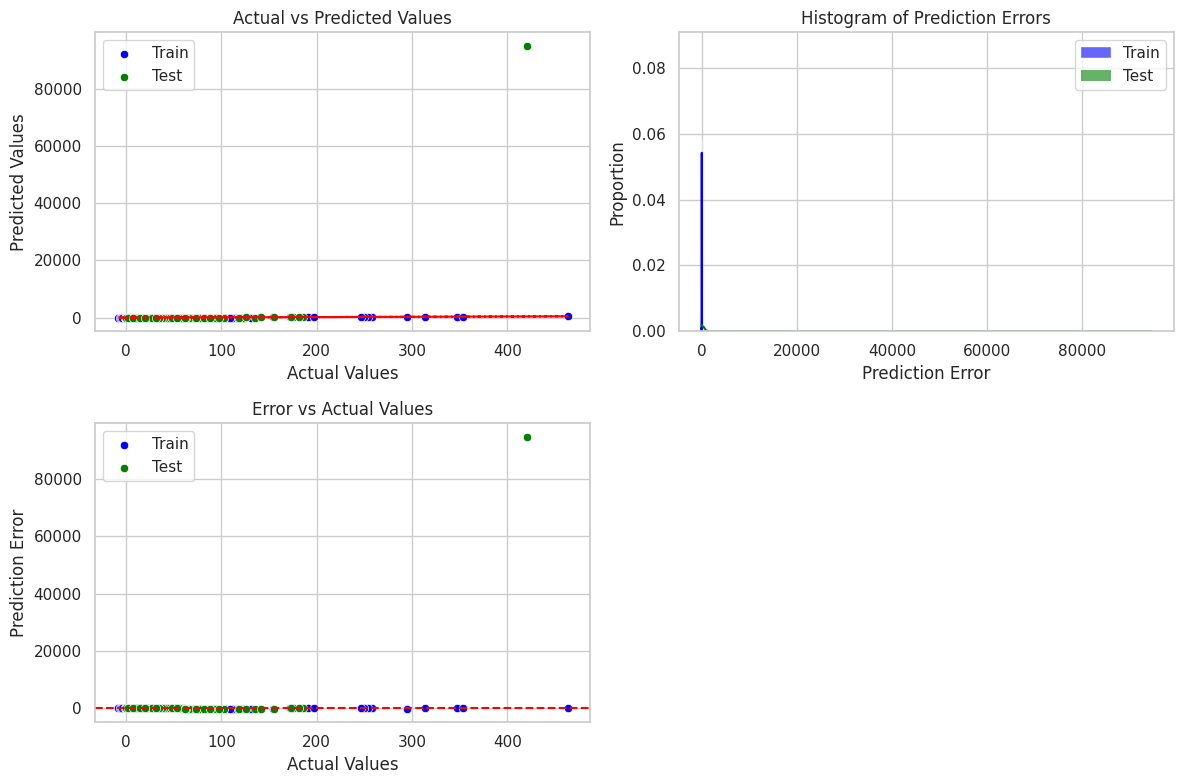

Train RMSE: 9.839931292394732 | Test RMSE: 56.935595851334014
Ratio Test_RMSE/Train_RSME: 5.786178191644432


In [49]:
X2 = X.copy()

#Ingenieria de Variables
X2 = np.reshape(X2, (N,1))
power = [n for n in range(2,20)]
for p in power:
    X2 = np.concatenate((X2,np.power(X[:,0],p).reshape((N,1))), axis=1)
# for p in power:
#     X2 = np.concatenate((X2,np.power(X[:,0],-p).reshape((N,1))), axis=1)
foo_regresion(X2,Y,.2)

+ Que paso con el nuestro error respecto a lo anterior, tanto en test como en train?
+ Como es posible que ocurra esto cuando tenemos mas varaibles, no deberia de mejorar la prediccion?

## Comportamiento mas complejo

Creemos funciones con comportamiento mas complejo, en este caso utilicemos recursividad (podria representar series de tiempo)

$y_t =  .8*y_{t-1} + x + ln(x) + 1/x + x^{1.3} $

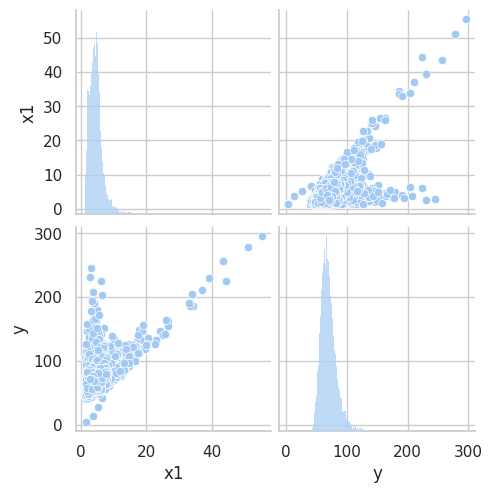

In [50]:
# Seed for reproducibility
np.random.seed(589)

N = 10000

# Generate X
X = np.random.uniform(1, 5, size=(N, 1)) + np.random.lognormal(0, 1, size=(N, 1))

mean = [1, 1]
cov = [[2, .3], [.3, 5]]

# Initialize Y
Y = np.zeros(N)

# Generate Y recursively
for i in range(N):
    if i == 0:
        # Base case for the first value of Y
        Y[i] = X[i] + np.log(X[i]) + 1 / X[i] + np.power(X[i], 1.3)
    else:
        # Recursive relation: Y[i] depends on Y[i-1] and current X[i]
        Y[i] = 0.8 * Y[i - 1] + X[i] + np.log(X[i]) + 1 / X[i] + np.power(X[i], 1.3) 

df = pd.DataFrame(data={'x1': X.flatten(), 'y': Y})
sns.pairplot(df)


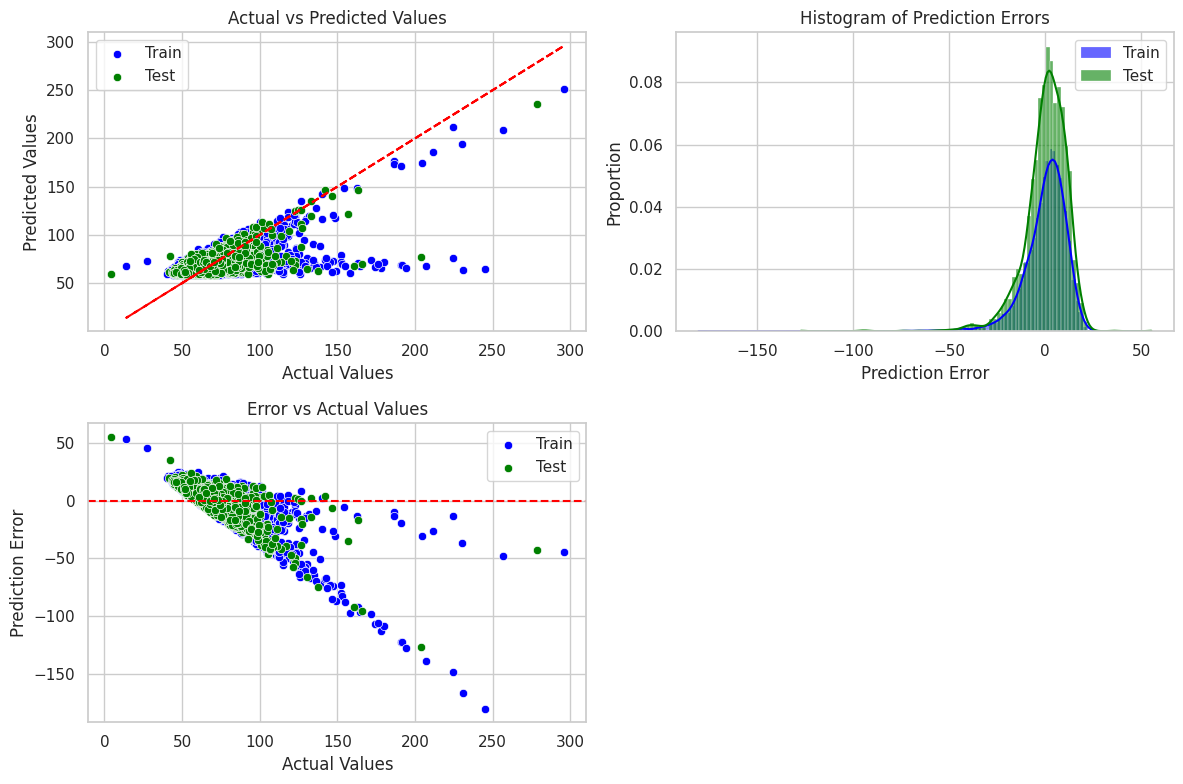

Train RMSE: 8.386982278127848 | Test RMSE: 8.216287766794842
Ratio Test_RMSE/Train_RSME: 0.9796476842715938


In [51]:
foo_regresion(X,Y,.2)

Ahora tratemos de mejorar nuestro modelo solo utilizando/creando variables polinomiales de nuestras X's y veamos si mejora.

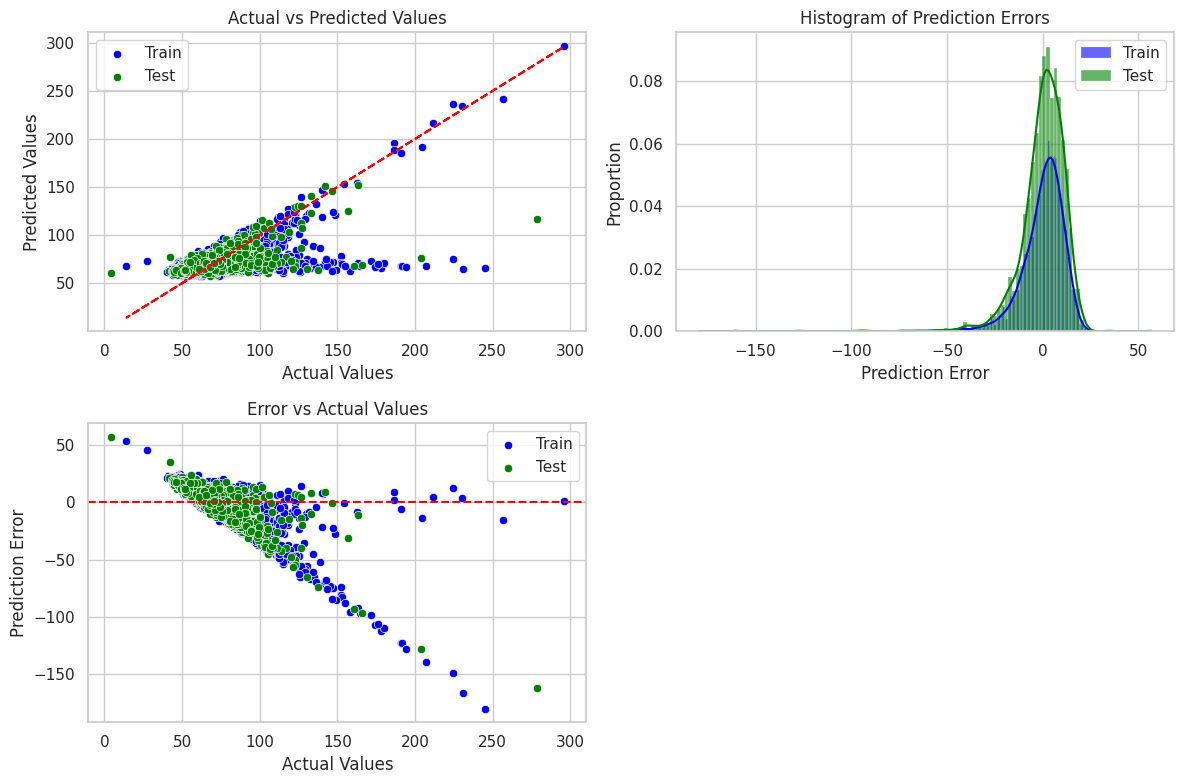

Train RMSE: 8.345957090938537 | Test RMSE: 8.253914747883762
Ratio Test_RMSE/Train_RSME: 0.9889716251770923


In [52]:
X2 = X.copy()

#Ingenieria de Variables
power = [n for n in range(2,10)]
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],-p).reshape((N,1))), axis=1)
foo_regresion(X2,Y,.2)

+ Que esta pasando con el error de test respecto a los errores con el modelo mas simple?

# Tarea

1. Juega con las funciones, datos y transformaciones del notebook para que los conceptos queden claros
2. Responde las preguntas que se encuntra a lo largo del notebook
3. Responde las siguientes preguntas
4. Envia el notebook de Tarea con:
   1. (4 ultimos digitos de tu CU)\_(tu nombre)\_(nombre del notebook)
      1. Por ejemplo: `7252_mario_04_train_test.ipynb`


## Preguntas

Responde las siguientes preguntas, pero esta vez piensa en terminos de como se comporta el modelo en el `test` set.

1. Como sabes que el modelo es bueno o malo, que criterio utilizarias?

Respuesta:

2. Si no pudieras graficar como sabrias si el modelo es bueno o malo?

Respuesta:

3. Da una regla lo mas "universal" o "general" posible para poder definir si tu modelo es bueno o malo. Piensa:
   1. En abstracto / Matematicamente
   2. En un problema real/aplicado

Respuesta:

+ Que esta pasando con el error de test cuando aumentamos el grado del polinomio con fuerza bruta? 
+ Es sensato dejar creecer el polinomio de manera arbitraria para mejorar los errores en `test`? Osea podemos crecer arbitrariamente el tamano del polinomio? Que esta pasando?

Respuesta: